In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Dùng thư viện yfinance để tải dataset 
import yfinance as yf

start_date = '2019-01-01'
end_date = '2023-03-31'
symbol = 'ETH-USD' 

data = yf.download(symbol, start=start_date, end=end_date)
data.to_csv('/content/drive/MyDrive/Datasets/ETH-USD.csv')

[*********************100%***********************]  1 of 1 completed


In [69]:
# Xem data 
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...
2023-03-26,1743.842163,1797.880249,1741.182861,1775.676758,1775.676758,6990313307
2023-03-27,1775.481323,1781.379272,1690.516602,1715.460815,1715.460815,8585750760
2023-03-28,1715.327393,1791.110962,1702.564697,1772.785645,1772.785645,8346890042


In [70]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [71]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Datasets/ETH-USD.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets - 7 - 2 - 1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [72]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [73]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [74]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[4556.94118784 4560.41062819 4563.88006854 4567.34950889 4570.81894923
 4574.28838958 4577.75782993 4581.22727028 4584.69671062 4588.16615097
 4591.63559132 4595.10503167 4598.57447201 4602.04391236 4605.51335271
 4608.98279306 4612.4522334  4615.92167375 4619.3911141  4622.86055444
 4626.32999479 4629.79943514 4633.26887549 4636.73831583 4640.20775618
 4643.67719653 4647.14663688 4650.61607722 4654.08551757 4657.55495792]


In [75]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 2830.6811454970857
Testing RMSE: 1687.8442638771844


Validation RMSE: 2830.6811454970857
Testing RMSE: 1687.8442638771844


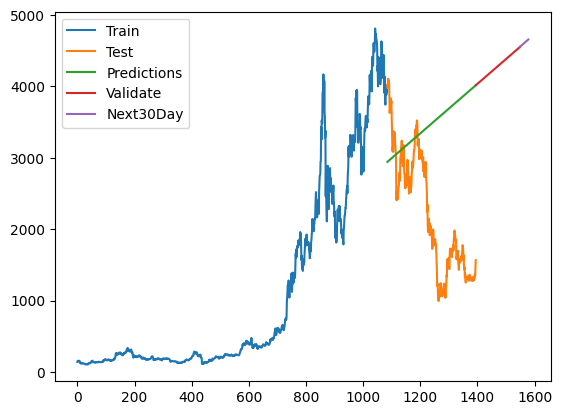

In [76]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [77]:
test_data.index

RangeIndex(start=1085, stop=1395, step=1)

In [78]:
# import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
# mae = mean_absolute_error(y_test,y_pred)
# print('MAE:', mae) 
# mse = mean_squared_error(y_test,y_pred)
# print('MSE:', mse)
r_squared = r2_score(y_test, y_pred)
print("Test_R-squared: ", r_squared) 
r_squared = r2_score(y_val, y_pred_val)
print("Val_R-squared: ", r_squared) 
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print("Testing MAPE",test_mape)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
print("Validation MAPE",val_mape)



Test_R-squared:  -3.159398822415505
Val_R-squared:  -188.6056968195584
Testing MAPE 0.9086223339601669
Validation MAPE 1.987040194976861
